# ML Group Project - Data Cleaning & KNN Algorithm testing of data

1. Import of the Python libraries

In [114]:
import pandas as pd  #build dataframe
import numpy as np
import matplotlib.pyplot as plt #to graph data
import seaborn as sns # for heatmap of features

from sklearn.model_selection import train_test_split #training algorithm libraries
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

2. Read in CSV files

In [115]:
opal_corsa_01 = pd.read_csv("opel_corsa_01.csv", sep = ';')
opal_corsa_01["Make"] = "Opal Corsa"
opal_corsa_01["Source File"] = 1

opal_corsa_02 = pd.read_csv("opel_corsa_02.csv", sep = ';')
opal_corsa_02["Make"] = "Opal Corsa"
opal_corsa_02["Source File"] = 2

peugeot_207_01 = pd.read_csv("peugeot_207_01.csv", sep = ';')
peugeot_207_01["Make"] = "Peugeot 207"
peugeot_207_01["Source File"] = 1

peugeot_207_02 = pd.read_csv("peugeot_207_02.csv", sep = ';')
peugeot_207_02["Make"] = "Peugeot 207"
peugeot_207_02["Source File"] = 2

3. Review the record counts for each data set using a column with a string value and to observe if there is any imbalance in the dataset

In [116]:
print(opal_corsa_01['Make'].value_counts()[:])
print(opal_corsa_02['Make'].value_counts()[:])

print(peugeot_207_01['Make'].value_counts()[:])
print(peugeot_207_02['Make'].value_counts()[:])

Opal Corsa    7038
Name: Make, dtype: int64
Opal Corsa    4092
Name: Make, dtype: int64
Peugeot 207    8199
Name: Make, dtype: int64
Peugeot 207    4446
Name: Make, dtype: int64


4. The count values for each data set do not suggest any imbalance in the data set, 47% records Opel Corsa, 53% records Peugeot 207

5. Combine the four datasets into one dataset

In [117]:
dataset = [opal_corsa_01, opal_corsa_02, peugeot_207_01, peugeot_207_02]

combined = pd.concat(dataset)

data_pre_cleaning = combined.drop('Unnamed: 0', axis = 1)  #remove the first column

data_pre_cleaning.to_csv("pre_cleaning_dataset.csv",index = False)

data_pre_cleaning.shape

(23775, 19)

6. Check the structure of the combined dataset, check for null values, remove any rows with NaN values and remove columns that are not relevant to the analysis

In [118]:
#display the first five rows of the dataset
data_pre_cleaning.head()

,AltitudeVariation,VehicleSpeedInstantaneous,VehicleSpeedAverage,VehicleSpeedVariance,VehicleSpeedVariation,LongitudinalAcceleration,EngineLoad,EngineCoolantTemperature,ManifoldAbsolutePressure,EngineRPM,MassAirFlow,IntakeAirTemperature,VerticalAcceleration,FuelConsumptionAverage,roadSurface,traffic,drivingStyle,Make,Source File
0,-2.299988,25.670519,13.223501,121.592690,-2.476980,0.3555,4.705883,68.0,106.0,1796.0,15.81,24.0,-0.1133,19.497335,SmoothCondition,LowCongestionCondition,EvenPaceStyle,Opal Corsa,1
1,-2.099976,24.094259,13.638919,120.422571,-1.576260,0.4492,10.588236,68.0,103.0,1689.0,14.65,22.0,-0.1289,19.515722,SmoothCondition,LowCongestionCondition,EvenPaceStyle,Opal Corsa,1
2,-1.500000,22.743179,14.031043,118.456769,-1.351080,0.4258,27.450981,68.0,103.0,1599.0,11.85,21.0,-0.1328,19.441765,SmoothCondition,LowCongestionCondition,EvenPaceStyle,Opal Corsa,1
3,0.100037,22.292820,14.171073,117.571308,-0.450359,0.4140,24.313726,69.0,104.0,1620.0,12.21,20.0,-0.0859,19.388769,SmoothCondition,LowCongestionCondition,EvenPaceStyle,Opal Corsa,1
4,0.099976,23.643900,14.328954,117.074149,1.351080,0.3945,20.000000,69.0,104.0,1708.0,11.91,21.0,-0.0664,19.301638,SmoothCondition,LowCongestionCondition,EvenPaceStyle,Opal Corsa,1


In [119]:
#find all columns that contain null values using 'isna' function but present the data in column format

data_pre_cleaning.isna().any()

AltitudeVariation            False
VehicleSpeedInstantaneous     True
VehicleSpeedAverage          False
VehicleSpeedVariance         False
VehicleSpeedVariation        False
LongitudinalAcceleration     False
EngineLoad                    True
EngineCoolantTemperature      True
ManifoldAbsolutePressure      True
EngineRPM                     True
MassAirFlow                   True
IntakeAirTemperature          True
VerticalAcceleration         False
FuelConsumptionAverage        True
roadSurface                  False
traffic                      False
drivingStyle                 False
Make                         False
Source File                  False
dtype: bool

In [120]:
#drop any rows with NaN values

clean_dataset = data_pre_cleaning.dropna()

In [121]:
#confirm that there are now no rows with NaN in the dataset

clean_dataset.isna().any()

AltitudeVariation            False
VehicleSpeedInstantaneous    False
VehicleSpeedAverage          False
VehicleSpeedVariance         False
VehicleSpeedVariation        False
LongitudinalAcceleration     False
EngineLoad                   False
EngineCoolantTemperature     False
ManifoldAbsolutePressure     False
EngineRPM                    False
MassAirFlow                  False
IntakeAirTemperature         False
VerticalAcceleration         False
FuelConsumptionAverage       False
roadSurface                  False
traffic                      False
drivingStyle                 False
Make                         False
Source File                  False
dtype: bool

In [122]:
#drop the source file column

clean_dataset1 = clean_dataset.drop(['Source File'], axis=1)

In [123]:
#check the dataset structure

clean_dataset1.head()

,AltitudeVariation,VehicleSpeedInstantaneous,VehicleSpeedAverage,VehicleSpeedVariance,VehicleSpeedVariation,LongitudinalAcceleration,EngineLoad,EngineCoolantTemperature,ManifoldAbsolutePressure,EngineRPM,MassAirFlow,IntakeAirTemperature,VerticalAcceleration,FuelConsumptionAverage,roadSurface,traffic,drivingStyle,Make
0,-2.299988,25.670519,13.223501,121.592690,-2.476980,0.3555,4.705883,68.0,106.0,1796.0,15.81,24.0,-0.1133,19.497335,SmoothCondition,LowCongestionCondition,EvenPaceStyle,Opal Corsa
1,-2.099976,24.094259,13.638919,120.422571,-1.576260,0.4492,10.588236,68.0,103.0,1689.0,14.65,22.0,-0.1289,19.515722,SmoothCondition,LowCongestionCondition,EvenPaceStyle,Opal Corsa
2,-1.500000,22.743179,14.031043,118.456769,-1.351080,0.4258,27.450981,68.0,103.0,1599.0,11.85,21.0,-0.1328,19.441765,SmoothCondition,LowCongestionCondition,EvenPaceStyle,Opal Corsa
3,0.100037,22.292820,14.171073,117.571308,-0.450359,0.4140,24.313726,69.0,104.0,1620.0,12.21,20.0,-0.0859,19.388769,SmoothCondition,LowCongestionCondition,EvenPaceStyle,Opal Corsa
4,0.099976,23.643900,14.328954,117.074149,1.351080,0.3945,20.000000,69.0,104.0,1708.0,11.91,21.0,-0.0664,19.301638,SmoothCondition,LowCongestionCondition,EvenPaceStyle,Opal Corsa


7. Check the data statistics for the dataset

In [124]:
# summuary of the statistically breakdown for the integer based features

clean_dataset1.describe()

,AltitudeVariation,VehicleSpeedInstantaneous,VehicleSpeedAverage,VehicleSpeedVariance,VehicleSpeedVariation,LongitudinalAcceleration,EngineLoad,EngineCoolantTemperature,ManifoldAbsolutePressure,EngineRPM,MassAirFlow,IntakeAirTemperature,VerticalAcceleration,FuelConsumptionAverage
count,23762.000000,23762.000000,23762.000000,23762.000000,23762.000000,23762.000000,23762.000000,23762.000000,23762.000000,23762.000000,23762.000000,23762.000000,23762.000000,23762.000000
mean,-0.263387,38.651043,38.813804,171.961782,-0.014447,0.681711,36.765639,70.824299,115.197669,1486.886310,16.046019,23.483377,0.463987,15.170593
std,2.091693,33.863575,31.148168,182.788513,2.374378,1.583258,26.642572,15.681131,20.457661,578.032388,9.691938,10.902092,3.463569,4.603914
min,-24.600006,0.000000,0.000000,0.000000,-18.000002,-3.065000,0.000000,12.000000,88.000000,0.000000,0.880000,7.000000,-2.763100,7.271883
25%,-1.399998,11.700000,15.996519,46.048954,-0.900001,-0.219000,18.823530,63.000000,102.000000,854.000000,6.970000,16.000000,-0.553675,11.672288
50%,-0.099998,31.500000,29.325470,113.972026,0.000000,0.390700,31.372549,79.000000,107.000000,1485.250000,15.360000,19.000000,-0.078100,14.519330
75%,0.700001,54.899998,50.159999,230.295981,0.900002,1.159850,58.431374,81.000000,120.000000,1955.875000,21.717499,31.000000,0.237450,18.288337
max,11.400002,124.749725,121.330733,1418.370369,97.199997,8.477800,100.000000,89.000000,252.000000,3167.000000,73.250000,65.000000,17.944800,45.336861


8. The project team reviewed the output types variables for the dataset are "Driving Style", "Road Surface Conditions", & "Traffic", and decided to analysis the "Driving Style" variable. There are two classes Even Pace and Aggressive for the Driving output. These two classes will be converted into integer values for the remainder of the analysis.

In [125]:
# replace the driving style string values to binary values as there are only two class possibilities

clean_dataset1 = clean_dataset1.replace(to_replace="EvenPaceStyle",value="0")

clean_dataset1 = clean_dataset1.replace(to_replace="AggressiveStyle", value="1")

9. Carry out a correlation analysis on the features

In [126]:
#run a correlation check on the dataframe to identify what features we want to use

clean_dataset1.corr()

,AltitudeVariation,VehicleSpeedInstantaneous,VehicleSpeedAverage,VehicleSpeedVariance,VehicleSpeedVariation,LongitudinalAcceleration,EngineLoad,EngineCoolantTemperature,ManifoldAbsolutePressure,EngineRPM,MassAirFlow,IntakeAirTemperature,VerticalAcceleration,FuelConsumptionAverage
AltitudeVariation,1.000000,0.025879,0.048324,-0.105666,-0.009621,0.078604,0.140768,-0.008699,0.100146,-0.014979,0.034940,0.095439,0.119419,0.006373
VehicleSpeedInstantaneous,0.025879,1.000000,0.866985,-0.053748,0.041207,0.032659,0.274486,0.238059,0.718100,0.839419,0.815264,0.346447,0.058170,-0.478509
VehicleSpeedAverage,0.048324,0.866985,1.000000,-0.035489,-0.072630,0.166126,0.257299,0.297121,0.604774,0.650310,0.636809,0.347853,0.023596,-0.616398
VehicleSpeedVariance,-0.105666,-0.053748,-0.035489,1.000000,0.034471,-0.020616,-0.081695,0.069674,-0.000172,-0.004820,0.007627,-0.110981,-0.012413,-0.110109
VehicleSpeedVariation,-0.009621,0.041207,-0.072630,0.034471,1.000000,-0.107180,0.275092,-0.027337,0.255490,0.249716,0.271620,0.061462,0.030560,0.052683
LongitudinalAcceleration,0.078604,0.032659,0.166126,-0.020616,-0.107180,1.000000,-0.007790,0.046922,0.006560,-0.027009,-0.026349,0.138538,0.743732,-0.050503
EngineLoad,0.140768,0.274486,0.257299,-0.081695,0.275092,-0.007790,1.000000,-0.070571,0.460027,0.220411,0.324993,0.322086,-0.008197,-0.111447
EngineCoolantTemperature,-0.008699,0.238059,0.297121,0.069674,-0.027337,0.046922,-0.070571,1.000000,0.255014,0.243822,0.172759,0.297494,-0.008599,-0.450022
ManifoldAbsolutePressure,0.100146,0.718100,0.604774,-0.000172,0.255490,0.006560,0.460027,0.255014,1.000000,0.709302,0.871438,0.197140,0.135731,-0.272880
EngineRPM,-0.014979,0.839419,0.650310,-0.004820,0.249716,-0.027009,0.220411,0.243822,0.709302,1.000000,0.875036,0.250008,0.114045,-0.317040


Visualise the correlation data into a Heatmap to make it easier to identify features that have correlation.

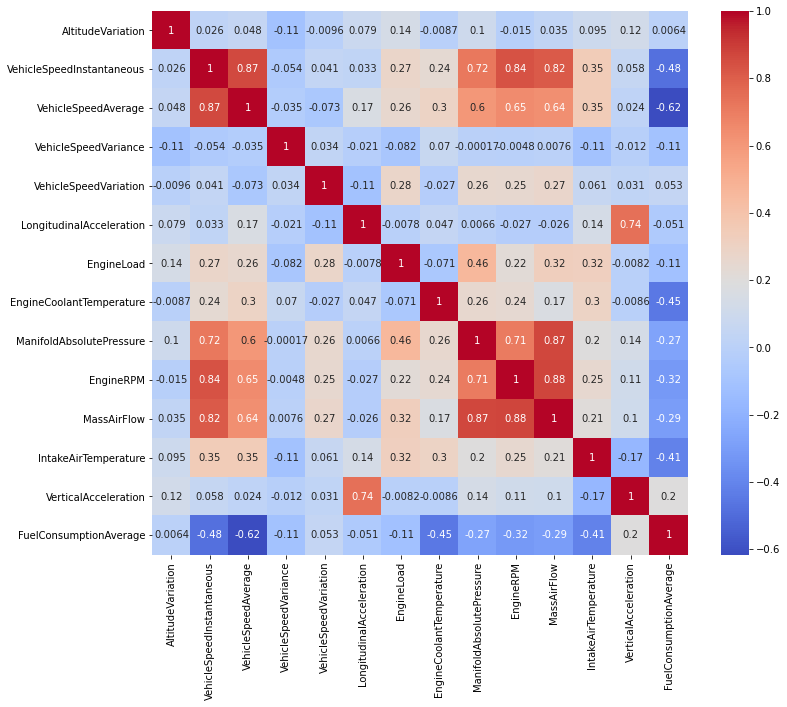

In [127]:
#Create a heatmap is add to the visualisaton of the correlation (Pearson Correlation) 
plt.figure(figsize=(12,10))
cor = clean_dataset1.corr()
#sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)

sns.heatmap(cor, annot=True, cmap="coolwarm")
plt.show()

The following features on the heatmap have a correlation higher that 0.5 and -0.5 

VehicleSpeedInstantaneous - VehicleSpeedAverage - 0.87

VehicleSpeedInstantaneous - ManifoldAbsolutePressure - 0.72

VehicleSpeedInstantaneous - EngineRPM - 0.84

VehicleSpeedInstantaneous - MassAirFlow - 0.82

VehicleSpeedAverage - ManifoldAbsolutePressure - 0.6

VehicleSpeedAverage - EngineRPM - 0.65

VehicleSpeedAverage - MassAirFlow - 0.64 

LongitudinalAcceleration - VerticalAcceleration - 0.74

ManifoldAbsolutePressure - EngineRPM - 0.71

ManifoldAbsolutePressure - MassAirFlow - 0.87

EngineRPM - MassAirFlow - 0.88

MassAirFlow - ManifoldAbsolutePressure - 0.87

VehicleSpeedAverage - FuelConsumptionAverage - -0.62

We will remove the following features as they are highly correlated to a remaining feature

EngineRPM

VehicleSpeedAverage

ManifoldAbsolutePressure

MassAirflow

VerticalAcceleration

FuelConsumptionAverage

This leaves the following features for the algorithm

AltitudeVariation

VehicleSpeedInstantaneous

VehicleSpeedVariance

VehicleSpeedVariation

LongitudinalAcceleration

EngineLoad

EngineCoolantTemperature

IntakeAirTemperature

VehicleSpeedAverage


8. Create a new dataset for the remaining features that will be analysed and remove the other output variables, Road Surface Conditions, & Traffic

In [128]:
#create a new dataset with an appropriate name and drop the feature and output variable columns no longer required.

driving_style_features = clean_dataset1.drop(['ManifoldAbsolutePressure','EngineRPM', 'MassAirFlow', 'VerticalAcceleration', 'FuelConsumptionAverage', 'roadSurface', 'traffic', 'Make'], axis=1)

In [129]:
#check new dataset structure

driving_style_features.head()

,AltitudeVariation,VehicleSpeedInstantaneous,VehicleSpeedAverage,VehicleSpeedVariance,VehicleSpeedVariation,LongitudinalAcceleration,EngineLoad,EngineCoolantTemperature,IntakeAirTemperature,drivingStyle
0,-2.299988,25.670519,13.223501,121.592690,-2.476980,0.3555,4.705883,68.0,24.0,0
1,-2.099976,24.094259,13.638919,120.422571,-1.576260,0.4492,10.588236,68.0,22.0,0
2,-1.500000,22.743179,14.031043,118.456769,-1.351080,0.4258,27.450981,68.0,21.0,0
3,0.100037,22.292820,14.171073,117.571308,-0.450359,0.4140,24.313726,69.0,20.0,0
4,0.099976,23.643900,14.328954,117.074149,1.351080,0.3945,20.000000,69.0,21.0,0


In [130]:
#check if there area any columns that contain null values using 'isna' function 

driving_style_features.isna().any()

AltitudeVariation            False
VehicleSpeedInstantaneous    False
VehicleSpeedAverage          False
VehicleSpeedVariance         False
VehicleSpeedVariation        False
LongitudinalAcceleration     False
EngineLoad                   False
EngineCoolantTemperature     False
IntakeAirTemperature         False
drivingStyle                 False
dtype: bool

No future null values found.

9. Start the KNN analysis of the driving_style_features dataset

In [131]:
#split data set into test and training. The test set was set at 20% and training set was at 80%
#and 9 features are to be analysed

X = driving_style_features.iloc[:, 0:9]
y = driving_style_features.iloc[:, 9]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)

In [132]:
# feature scaling
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [133]:
#calculation used to identify the k value for the analysis

import math
math.sqrt(len(y_test))

68.94200461257273

Define the model parameters. The calculated K value from the test data was so 68.942, so it is rounded up 69 and therefore reduces the risk of a tie. P = 2 as we have two parameters, and metric = euclidean which is the common metric used for KNN algorithms



In [134]:
#set the KNN classification algorithm settings

classifier = KNeighborsClassifier(n_neighbors=69, p=2, metric='euclidean')

In [135]:
#run the algorithm

classifier.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=69)

In [136]:
#predict the test results

y_pred = classifier.predict(X_test)
y_pred

array(['0', '0', '0', ..., '0', '0', '0'], dtype=object)

In [137]:
#Evaluate the model using confusion matrix

cm = confusion_matrix(y_test, y_pred)

print(cm)

[[4180   13]
 [ 518   42]]


The confusion matrix results show 4180 postive results for the "Even Pace" driving style class and 42 positive results for the "Aggressive" driving style 

In [138]:
#Run the KNN algorithn statistically report

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94      4193
           1       0.76      0.07      0.14       560

    accuracy                           0.89      4753
   macro avg       0.83      0.54      0.54      4753
weighted avg       0.87      0.89      0.85      4753



Driving Style classification report results interpretation - Even Pace Style (0 - 89%) has more precision than Aggressive Style (1 - 76%), the f1-score for Even Pace style is significantly higher than Aggressive (+80%). The Support values indicate an imbalance in the data set, 88% sample records Even Pace style and 12% Aggressive style.